In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
pd.pandas.set_option("display.max_columns", None)
pd.pandas.set_option("display.max_rows", None)

In [25]:
data = pd.read_excel("Titanic_dataset.xlsx")

data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [17]:
data.dtypes[data.dtypes == 'int64']

pclass      int64
survived    int64
sibsp       int64
parch       int64
dtype: object

In [26]:
data.shape

(1309, 14)

In [33]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [36]:
feature_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0]

feature_with_na

['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

In [38]:
numerical_feature = [feature for feature in data.columns if data.dtypes[feature] != 'O']

numerical_feature

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']

In [49]:
data[numerical_feature].head()

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN


In [61]:
survived_feature = [feature for feature in data.columns if 'survived' in feature]

data[survived_feature]

,survived
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


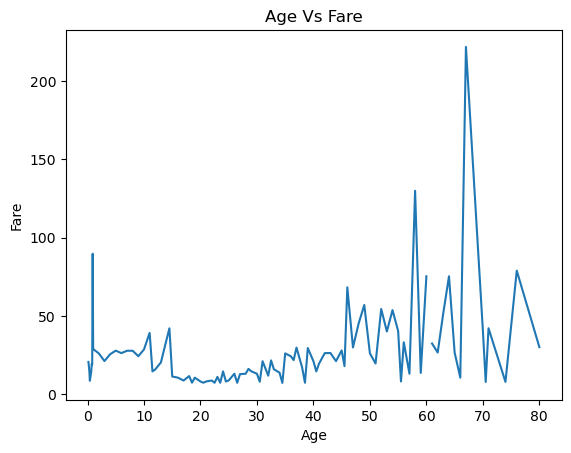

In [79]:
df = data.copy()

df.groupby('age')['fare'].median().plot()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Age Vs Fare")
plt.show()

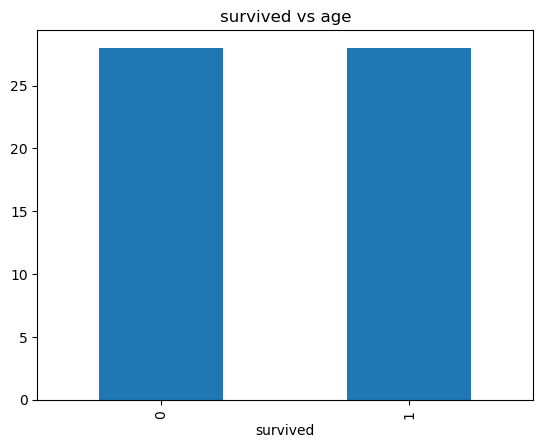

In [84]:
df = data.copy()

for feature in survived_feature:
    
    df.groupby(feature)['age'].median().plot.bar()
    
    plt.title('survived vs age')
    plt.show()

<Axes: >

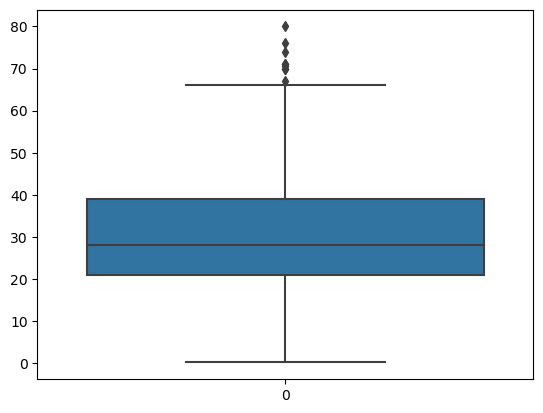

In [85]:
sns.boxplot(data.age)

In [88]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique() <= 25) ]

discrete_feature

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']

In [93]:
data[discrete_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
 6   body      121 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 71.7 KB


In [94]:
data[discrete_feature].head()

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN


In [95]:
continuous_feature = [feature for feature in numerical_feature if len(data[feature].unique()) > 25]

continuous_feature

['age', 'fare', 'body']

In [103]:
int_col = data.select_dtypes(include = "int64").columns.tolist()

print(f"integer columns list : {int_col}")

integer columns list : ['pclass', 'survived', 'sibsp', 'parch']


In [102]:
data[int_col].head()

,pclass,survived,sibsp,parch
0,1,1,0,0
1,1,1,1,2
2,1,0,1,2
3,1,0,1,2
4,1,0,1,2


In [105]:
float_col = data.select_dtypes(include = "float").columns.tolist()

print(f"float columns are : {float_col}")

float columns are : ['age', 'fare', 'body']


In [106]:
obj_col = data.select_dtypes(include = "O").columns.tolist()

print(f"Object columns are : {obj_col}")

Object columns are : ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']


In [107]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Dependant vs Independant relationship

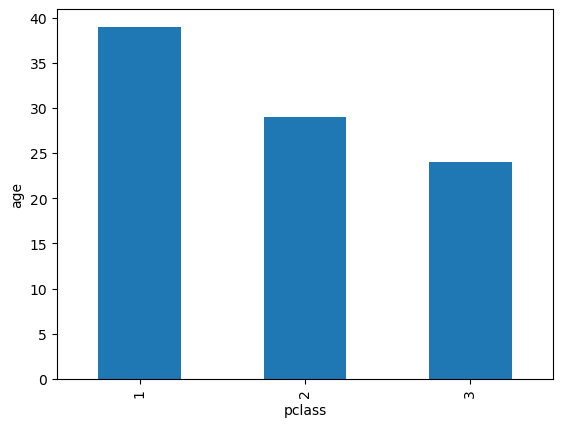

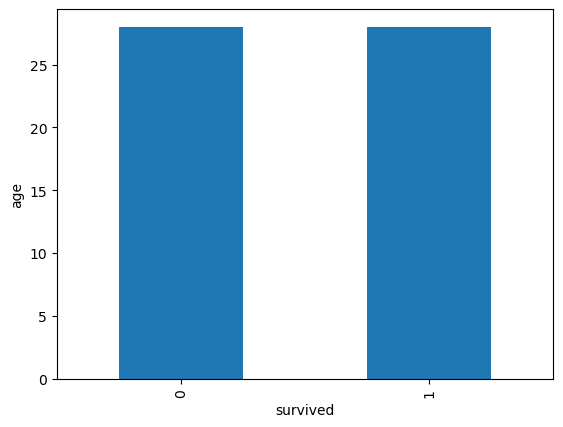

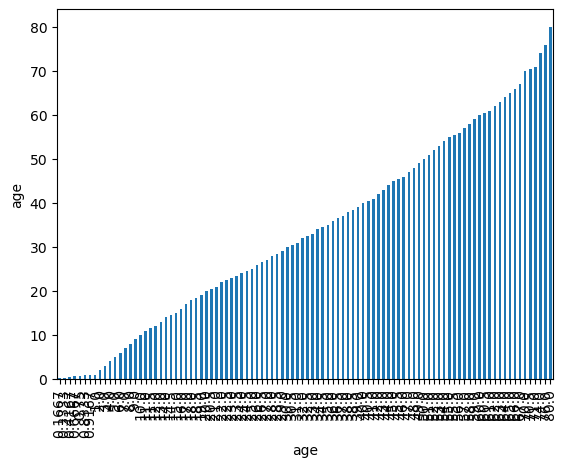

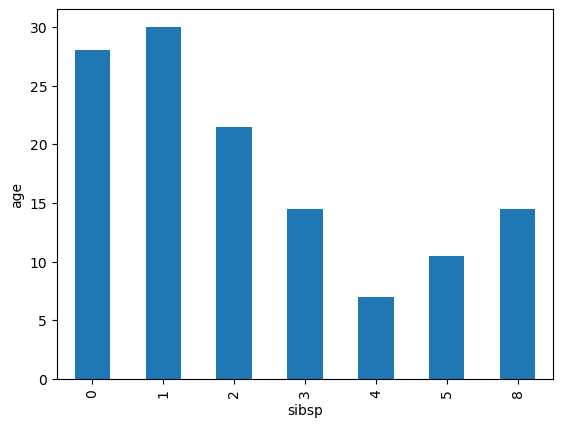

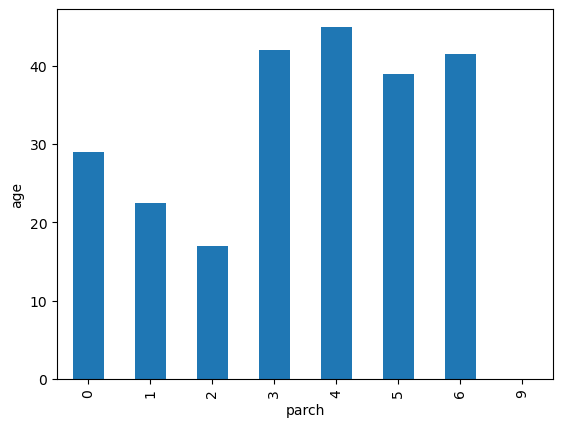

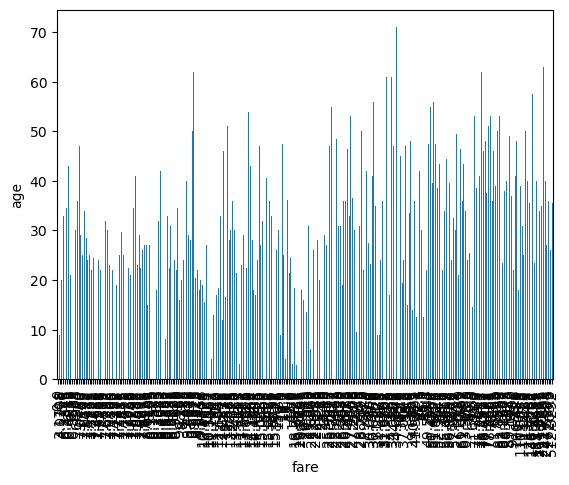

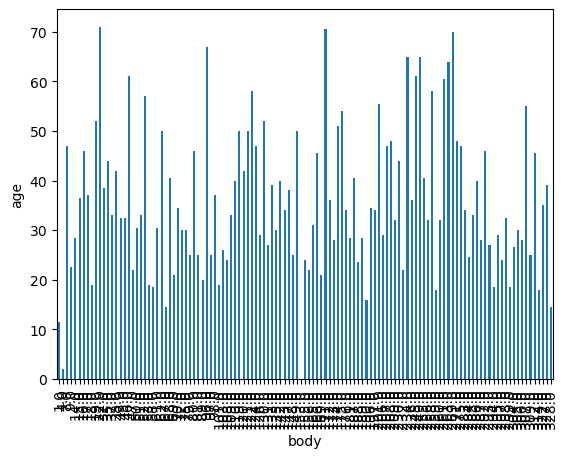

In [110]:
df = data.copy()

for feature in discrete_feature:
    
    df.groupby(feature)['age'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('age')
    plt.show()

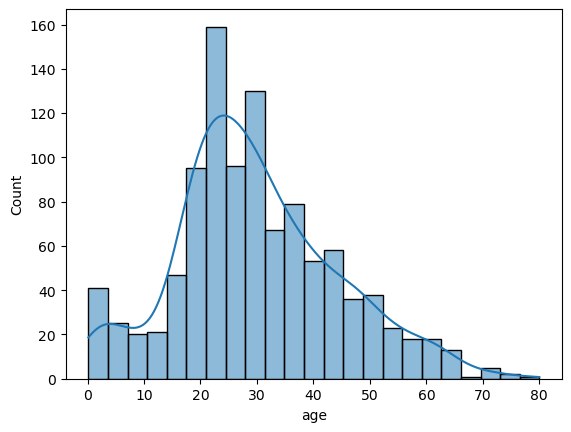

In [113]:
sns.histplot(data["age"], kde = True)

plt.show()